# ALA->SER (solvent)

In [1]:
import pickle

In [87]:
with open("/data/chodera/zhangi/perses_benchmark/neq/3/1/1_solvent.pickle", "rb") as f:
    htf = pickle.load(f)

In [88]:
for atom in htf._topology_proposal.old_topology.atoms():
    print(atom)

<Atom 0 (H1) of chain 0 residue 0 (ACE)>
<Atom 1 (CH3) of chain 0 residue 0 (ACE)>
<Atom 2 (H2) of chain 0 residue 0 (ACE)>
<Atom 3 (H3) of chain 0 residue 0 (ACE)>
<Atom 4 (C) of chain 0 residue 0 (ACE)>
<Atom 5 (O) of chain 0 residue 0 (ACE)>
<Atom 6 (N) of chain 0 residue 1 (ALA)>
<Atom 7 (H) of chain 0 residue 1 (ALA)>
<Atom 8 (CA) of chain 0 residue 1 (ALA)>
<Atom 9 (HA) of chain 0 residue 1 (ALA)>
<Atom 10 (CB) of chain 0 residue 1 (ALA)>
<Atom 11 (HB2) of chain 0 residue 1 (ALA)>
<Atom 12 (HB3) of chain 0 residue 1 (ALA)>
<Atom 13 (C) of chain 0 residue 1 (ALA)>
<Atom 14 (O) of chain 0 residue 1 (ALA)>
<Atom 15 (HB1) of chain 0 residue 1 (ALA)>
<Atom 16 (N) of chain 0 residue 2 (NME)>
<Atom 17 (H) of chain 0 residue 2 (NME)>
<Atom 18 (C) of chain 0 residue 2 (NME)>
<Atom 19 (H1) of chain 0 residue 2 (NME)>
<Atom 20 (H2) of chain 0 residue 2 (NME)>
<Atom 21 (H3) of chain 0 residue 2 (NME)>
<Atom 22 (O) of chain 1 residue 3 (HOH)>
<Atom 23 (H1) of chain 1 residue 3 (HOH)>
<Atom 24

In [89]:
for atom in htf._topology_proposal.new_topology.atoms():
    print(atom)

<Atom 0 (H1) of chain 0 residue 0 (ACE)>
<Atom 1 (CH3) of chain 0 residue 0 (ACE)>
<Atom 2 (H2) of chain 0 residue 0 (ACE)>
<Atom 3 (H3) of chain 0 residue 0 (ACE)>
<Atom 4 (C) of chain 0 residue 0 (ACE)>
<Atom 5 (O) of chain 0 residue 0 (ACE)>
<Atom 6 (N) of chain 0 residue 1 (SER)>
<Atom 7 (H) of chain 0 residue 1 (SER)>
<Atom 8 (CA) of chain 0 residue 1 (SER)>
<Atom 9 (HA) of chain 0 residue 1 (SER)>
<Atom 10 (CB) of chain 0 residue 1 (SER)>
<Atom 11 (HB2) of chain 0 residue 1 (SER)>
<Atom 12 (HB3) of chain 0 residue 1 (SER)>
<Atom 13 (C) of chain 0 residue 1 (SER)>
<Atom 14 (O) of chain 0 residue 1 (SER)>
<Atom 15 (OG) of chain 0 residue 1 (SER)>
<Atom 16 (HG) of chain 0 residue 1 (SER)>
<Atom 17 (N) of chain 0 residue 2 (NME)>
<Atom 18 (H) of chain 0 residue 2 (NME)>
<Atom 19 (C) of chain 0 residue 2 (NME)>
<Atom 20 (H1) of chain 0 residue 2 (NME)>
<Atom 21 (H2) of chain 0 residue 2 (NME)>
<Atom 22 (H3) of chain 0 residue 2 (NME)>
<Atom 23 (O) of chain 1 residue 3 (HOH)>
<Atom 24 

In [116]:
import mdtraj as md
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [107]:
# load in the new positions from reverse traj
trajs = []
for i in range(10):
    traj = md.load_pdb(f"/data/chodera/zhangi/perses_benchmark/neq/3/1/1_solvent_{i}_reverse_new.pdb")
    trajs.append(traj)
full_traj_rev = md.join(trajs)

In [108]:
full_traj_rev

<mdtraj.Trajectory with 200 frames, 1989 atoms, 661 residues, without unitcells at 0x2aba7cf9c710>

In [118]:
dihedrals_rev = np.sin(md.compute_dihedrals(full_traj_rev, np.array([[6, 8, 10, 15]])))

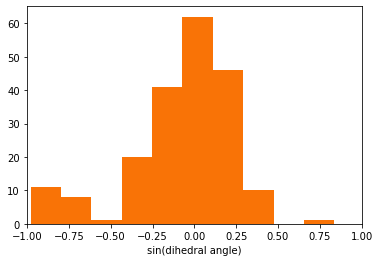

In [119]:
# Plot histogram 
plt.hist(dihedrals_rev, color='xkcd:orange')
plt.xlim(-1, 1)
plt.xlabel("sin(dihedral angle)")
plt.savefig("/data/chodera/zhangi/perses_benchmark/neq/3/1/1_solvent_reverse_new_dihedrals.png", dpi=300)
plt.show()

In [111]:
# Load in the new positions from the fwd traj
trajs = []
for i in range(10):
    traj = md.load_pdb(f"/data/chodera/zhangi/perses_benchmark/neq/3/1/1_solvent_{i}_forward_new.pdb")
    trajs.append(traj)
full_traj_fwd = md.join(trajs)

In [120]:
dihedrals_fwd = np.sin(md.compute_dihedrals(full_traj_fwd, np.array([[6, 8, 10, 15]])))

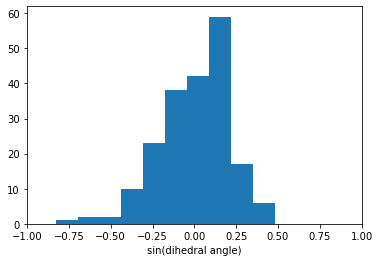

In [121]:
# Plot histogram 
plt.hist(dihedrals_fwd)
plt.xlim(-1, 1)
plt.xlabel("sin(dihedral angle)")
plt.savefig("/data/chodera/zhangi/perses_benchmark/neq/3/1/1_solvent_forward_new_dihedrals.png", dpi=300)
plt.show()

In [123]:
# Plot distributions on same plot
sns.distplot(dihedrals_fwd)
sns.distplot(dihedrals_rev)
plt.xlabel("sin(dihedral angle)")
plt.title(f"ALA -> SER solvent")
plt.savefig("/data/chodera/zhangi/perses_benchmark/neq/3/1/1_solvent_new_dihedrals.png", dpi=500)
plt.clf()

<Figure size 432x288 with 0 Axes>